In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
import os

os.chdir("/content/drive/MyDrive/smart-cart/yolo")

# Quantitative Evaluation + Interpretation





In [4]:
%%capture
!pip install ultralytics

In [2]:
from ultralytics import YOLO

# Load best fine-tunes model
model = YOLO("runs/segment/train11/weights/best.pt")

In [22]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)


val: Scanning /content/drive/MyDrive/smart-cart/yolo/datasets/labels/val.cache... 163 images, 0 backgrounds, 0 corrupt: 100%|██████████| 163/163 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_001900_D2S_validation.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_002721_D2S_validation.jpg: 3 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_008927_D2S_validation.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_023001_D2S_validation_wo_occlusion.jpg: 3 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_023305_D2S_validation.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_023326_D2S_validation_wo_occlusion.jpg: 5 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_023329_D2S_validation_wo_occlusion.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [01:53<00:00, 10.29s/it]


                   all        163       1784      0.845      0.518      0.601      0.528      0.843      0.517      0.562      0.446
gepa_bio_und_fair_fencheltee         21         34      0.788      0.219       0.42      0.382      0.788      0.219      0.399      0.317
gepa_bio_und_fair_kraeuterteemischung         20         30          1      0.143      0.542      0.474          1      0.143      0.539      0.413
gepa_bio_und_fair_kamillentee         16         24      0.895      0.358      0.577      0.511      0.895      0.358      0.539      0.431
ethiquable_gruener_tee_ceylon         15         27      0.981      0.519      0.601      0.532      0.981      0.519      0.539      0.452
gepa_bio_und_fair_pfefferminztee         15         18      0.584      0.702      0.529      0.489      0.538      0.647      0.484      0.411
gepa_bio_und_fair_rooibostee         25         43      0.826      0.554      0.625      0.548      0.826      0.554      0.567       0.45
kilimanjaro_tea_ea

In [23]:
classId_names = metrics.names

In [25]:
mean_results = metrics.mean_results()
print(f'Average Metrics on all the validation Dataset')
print(f'Box Precision: {mean_results[0]}')
print(f'Box Recall: {mean_results[1]}')
print(f'Box mAP50: {mean_results[2]}')
print(f'Box mAP50-95: {mean_results[3]}')

print(f'Seg Precision: {mean_results[4]}')
print(f'Seg Recall: {mean_results[5]}')
print(f'Seg mAP50: {mean_results[6]}')
print(f'Seg mAP50-95: {mean_results[7]}')

Average Metrics on all the validation Dataset
Box Precision: 0.8450080902399648
Box Recall: 0.5183307028365567
Box mAP50: 0.6011651628511738
Box mAP50-95: 0.528056001470853
Seg Precision: 0.8429118258530158
Seg Recall: 0.5167087441553261
Seg mAP50: 0.5622862888674275
Seg mAP50-95: 0.4457252449381383


In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (Replace with actual precision values from YOLO validation)
data = {
    "class_id": classId_names.values(),  # Class IDs
    "box_f1": metrics.box.f1,  # F1 for boxes
    "seg_f1": metrics.seg.f1,   # F1 for segmentation
    "box_precision": metrics.box.p,  # Precision for boxes
    "seg_precision": metrics.seg.p,   # Precision for segmentation
    "box_recall": metrics.box.r,  # Recall for boxes
    "seg_recall": metrics.seg.r,   # Recall for segmentation
    "box_map50": metrics.box.map50,
    "seg_map50": metrics.seg.map50,
    "box_map50-95": metrics.box.map,
    "seg_map50-95": metrics.seg.map,
}

# Convert to DataFrame
df = pd.DataFrame(data)

def plot_metric_barplot(df, metric):

  # Convert to long format for Seaborn
  df_melted = df.melt(id_vars=["class_id"],
                      value_vars=[f"box_{metric.lower()}", f"seg_{metric.lower()}"],
                      var_name="task",
                      value_name=metric.lower())

  # Rename task values for better readability
  df_melted["task"] = df_melted["task"].replace({f"box_{metric.lower()}": f"Box {metric.capitalize()}", f"seg_{metric.lower()}": f"Seg {metric.capitalize()}"})

  # Plot using Seaborn
  plt.figure(figsize=(18, 6))
  sns.barplot(x="class_id", y=metric.lower(), hue="task", data=df_melted, palette="viridis")
  # Rotate x-axis labels vertically
  plt.xticks(rotation=90)  # Set labels to 90 degrees

  # Add labels and title
  plt.xlabel("Class Names")
  plt.ylabel(metric.capitalize())
  plt.title(f"{metric.capitalize()} per Class (Bounding Box vs. Segmentation)")
  plt.legend(title="Task")
  plt.show()


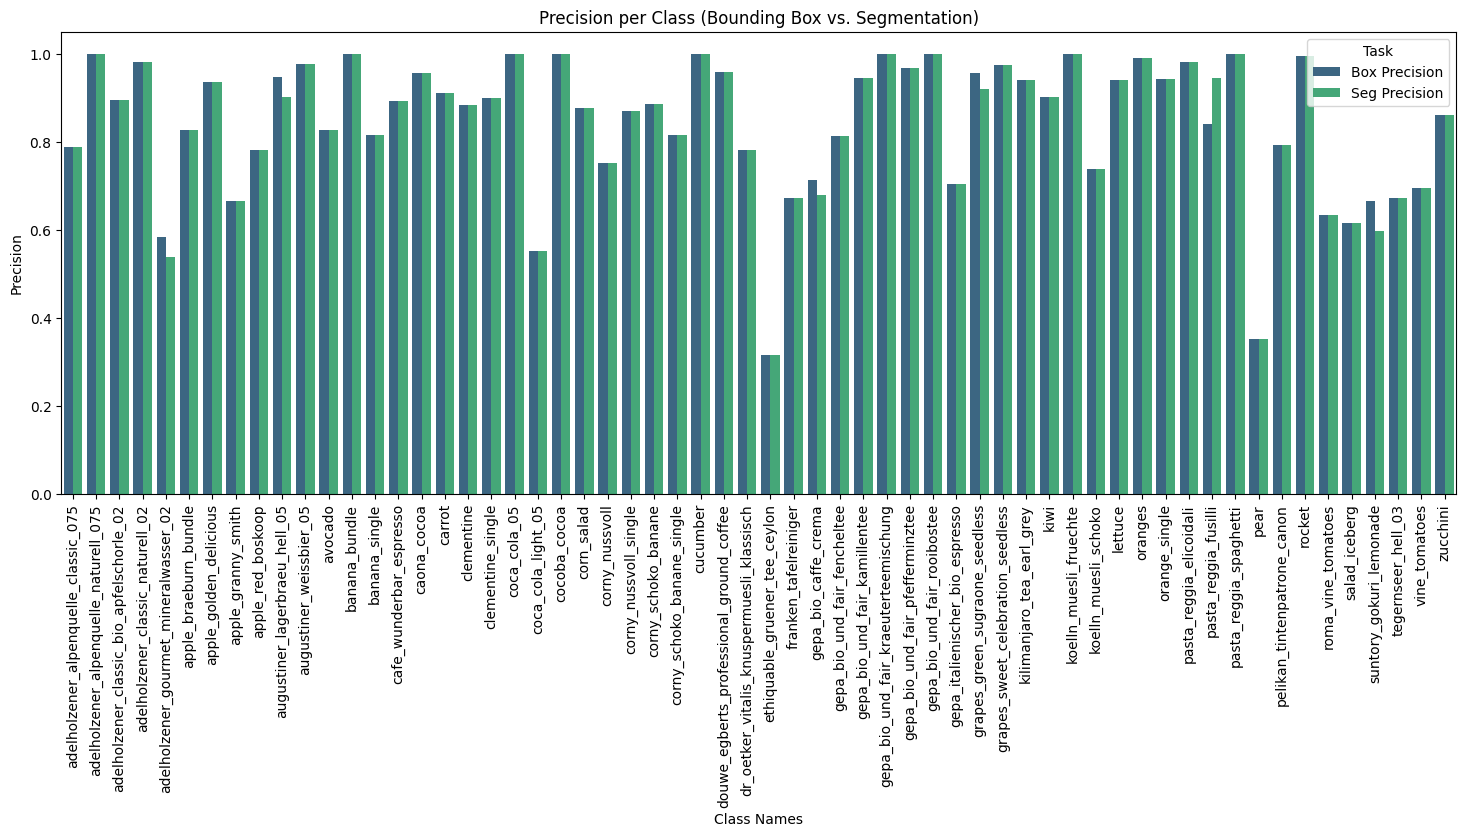

In [34]:
plot_metric_barplot(df, "Precision")

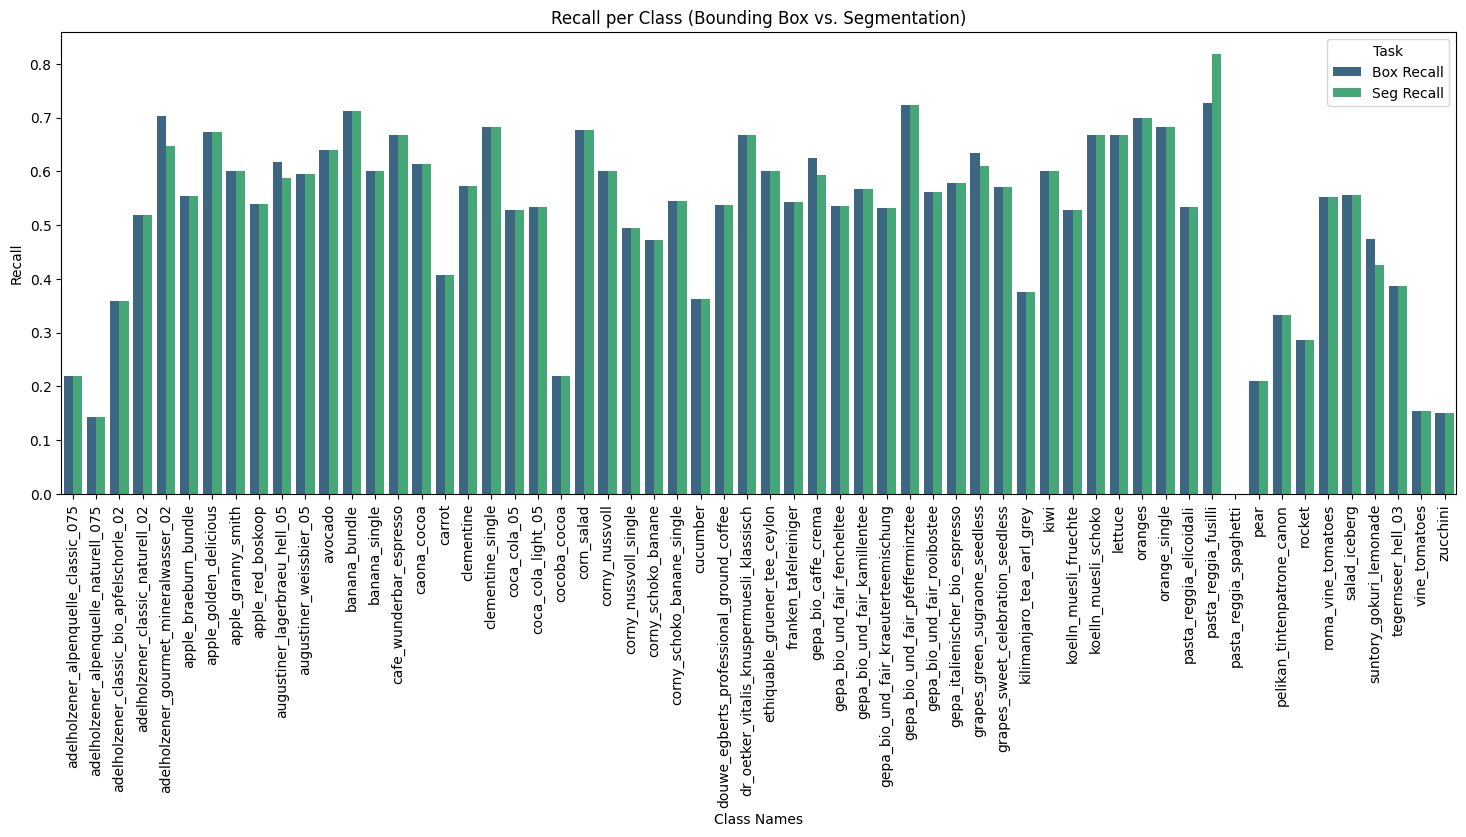

In [35]:
plot_metric_barplot(df, "Recall")

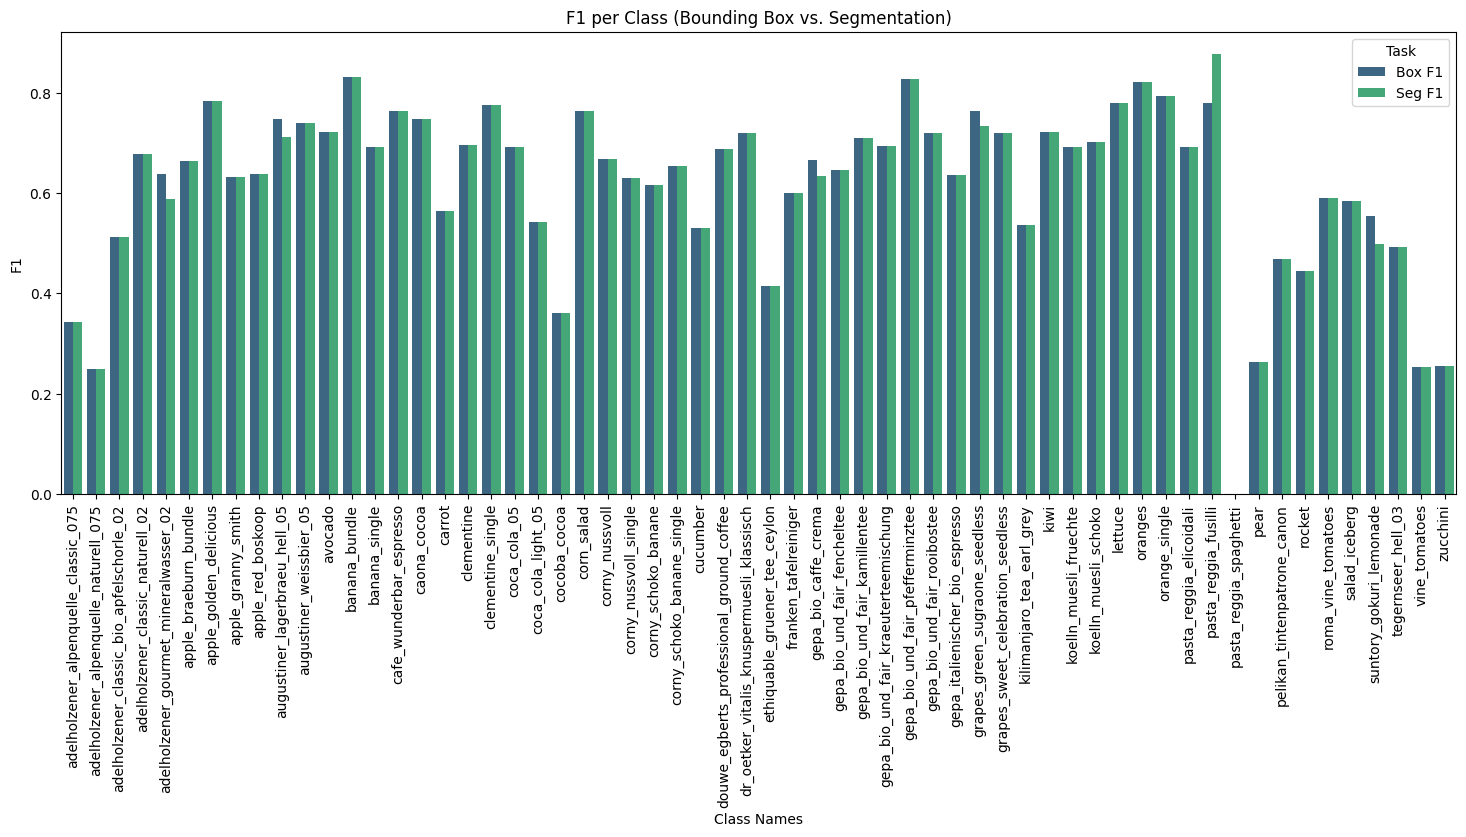

In [38]:
plot_metric_barplot(df, "F1")

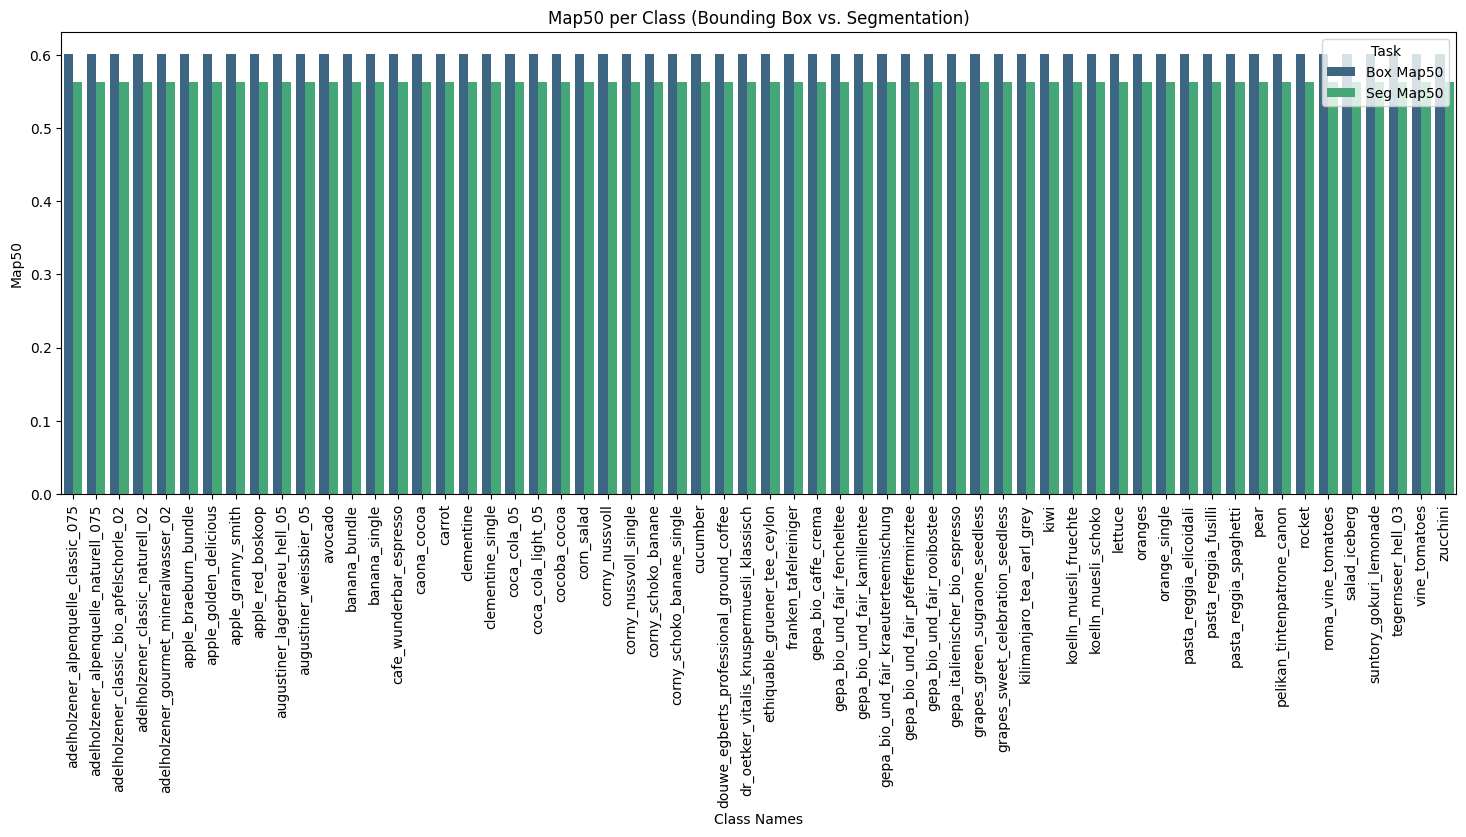

In [39]:
plot_metric_barplot(df, "Map50")

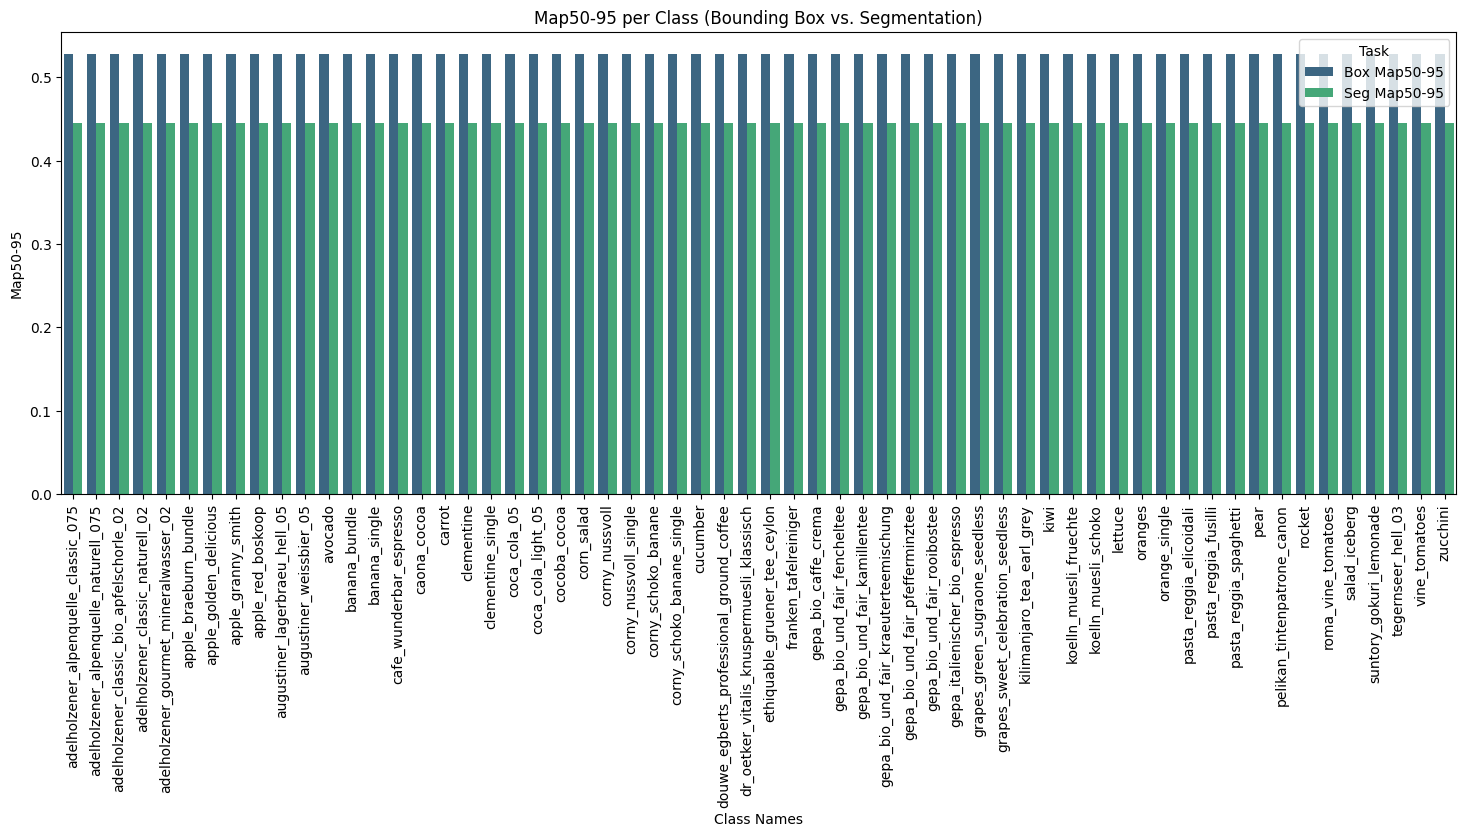

In [40]:
plot_metric_barplot(df, "Map50-95")

## Interpretation

Object detection and segmentation follows a similar trend: good precision, low recall. The model is missing instances rather than making incorrect segmentations/detections.
Results from mean average precision at different iou thresholds suggest that the accuracy of the model is moderate but can improve

# Qualitative Evaluation Interpretation

In [17]:
from random import choice, seed

seed(50)

# *.npy files were generated during training when caching the dataset
val_filenames = list(filter(lambda filename: not (".npy" in filename),os.listdir("./datasets/images/val")))
val_sample = [choice(val_filenames) for _ in range(10)]
val_sample

['D2S_066702_D2S_validation_random_background.jpg',
 'D2S_035414_D2S_validation.jpg',
 'D2S_068128_D2S_validation.jpg',
 'D2S_043205_D2S_validation.jpg',
 'D2S_066623_D2S_validation_random_background.jpg',
 'D2S_065327_D2S_validation.jpg',
 'D2S_066625_D2S_validation_clutter.jpg',
 'D2S_068423_D2S_validation_random_background.jpg',
 'D2S_066619_D2S_validation.jpg',
 'D2S_028118_D2S_validation.jpg']

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def draw_yolo_predictions_vs_ground_truth(image, boxes, masks, class_ids, true_masks, true_class_ids, class_names=None, colors=None):

    overlay_pred = image.copy()
    overlay_gt = image.copy()
    height, width = image.shape[:2]
    if colors is None:
        np.random.seed(42)
        colors = {i: np.random.randint(0, 255, (3,)) for i in set(class_ids).union(set(true_class_ids))}

    fig, ax = plt.subplots(1,2, figsize=(18,6))
    for box, mask, class_id in zip(boxes, masks, class_ids):

        x, y, w, h = box
        x1, y1, x2, y2 = int(x - w/2), int(y - h/2), int(x + w/2), int(y + h/2)
        color = colors[class_id]

        # Draw mask
        polygon = Polygon(mask, color=color/255, alpha=0.4)
        ax[0].add_patch(polygon)

        # Draw bounding box
        cv2.rectangle(overlay_pred, (x1, y1), (x2, y2), color.tolist(), 2)

        # Add label
        label = class_names[class_id] if class_names else f"Class {class_id}"
        cv2.putText(overlay_pred, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)

    for  true_mask, true_class_id in zip(true_masks, true_class_ids):

        # Draw True mask
        true_color = colors[true_class_id]
        poly_array = (true_mask*np.array([width, height])).astype(int)
        true_polygon = Polygon(poly_array,
                               color=true_color/255, alpha=0.4)
        ax[1].add_patch(true_polygon)

        # Compute bounding box (x_min, y_min, width, height)
        x_min, y_min = np.min(poly_array, axis=0)
        x_max, y_max = np.max(poly_array, axis=0)

        # Draw the bounding box
        cv2.rectangle(overlay_gt, (x_min, y_min), (x_max, y_max), true_color.tolist(), 2)

        # Add True label
        label = class_names[true_class_id] if class_names else f"Class {true_class_id}"
        cv2.putText(overlay_gt, label, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)


    ax[0].imshow(overlay_pred)
    ax[1].imshow(overlay_gt)
    ax[0].set_title("Predicted Masks")
    ax[1].set_title("Ground Truth Masks")
    plt.axis("off")
    plt.show()

def read_yolo_annotation(ann_path):

  with open(ann_path, 'r') as f:
    lines = f.readlines()

  instances = []

  for idx, line in enumerate(lines):

    class_id, *polygon = line.split(' ')
    instances.append({"classId": class_id,
                      "polygon": np.array(polygon).astype(float).reshape(-1,2)}) # save as numpy to facilitate restoring the coordinates later

  return instances


image 1/1 /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_066702_D2S_validation_random_background.jpg: 480x640 1 gepa_bio_und_fair_kamillentee, 1 gepa_bio_und_fair_pfefferminztee, 1 pelikan_tintenpatrone_canon, 1 cucumber, 1 pear, 2 pasta_reggia_fusillis, 1 corny_nussvoll_single, 1 cocoba_cocoa, 1 corn_salad, 1 augustiner_weissbier_05, 432.5ms
Speed: 2.8ms preprocess, 432.5ms inference, 40.6ms postprocess per image at shape (1, 3, 480, 640)


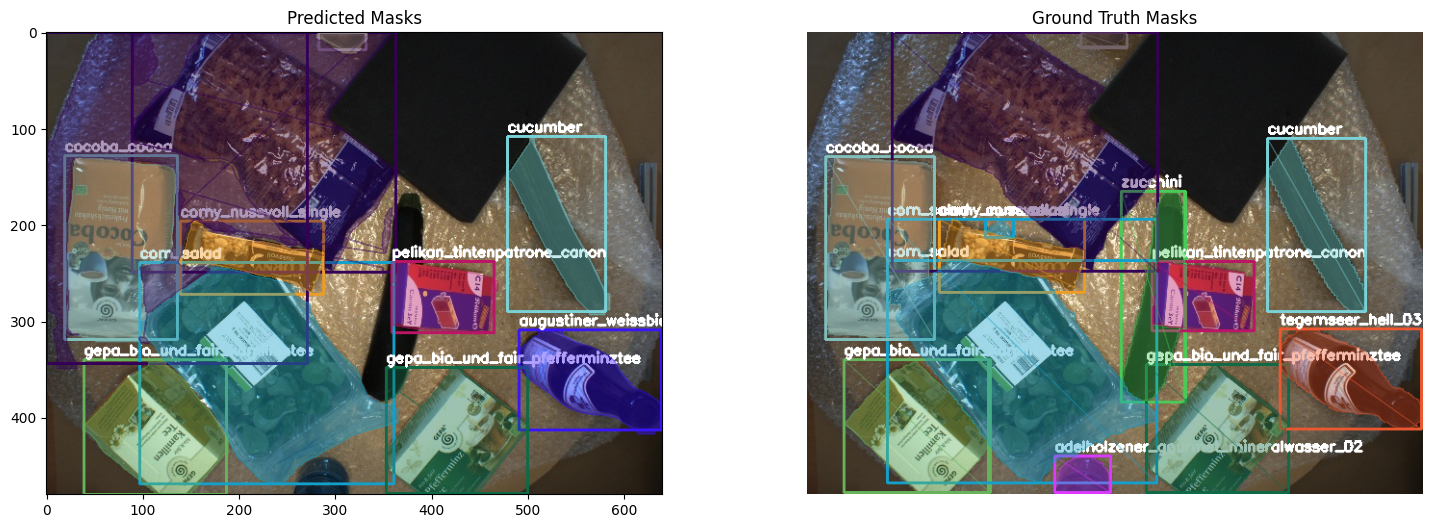


image 1/1 /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_035414_D2S_validation.jpg: 480x640 1 pelikan_tintenpatrone_canon, 1 kiwi, 1 cafe_wunderbar_espresso, 1 salad_iceberg, 533.9ms
Speed: 2.3ms preprocess, 533.9ms inference, 15.4ms postprocess per image at shape (1, 3, 480, 640)


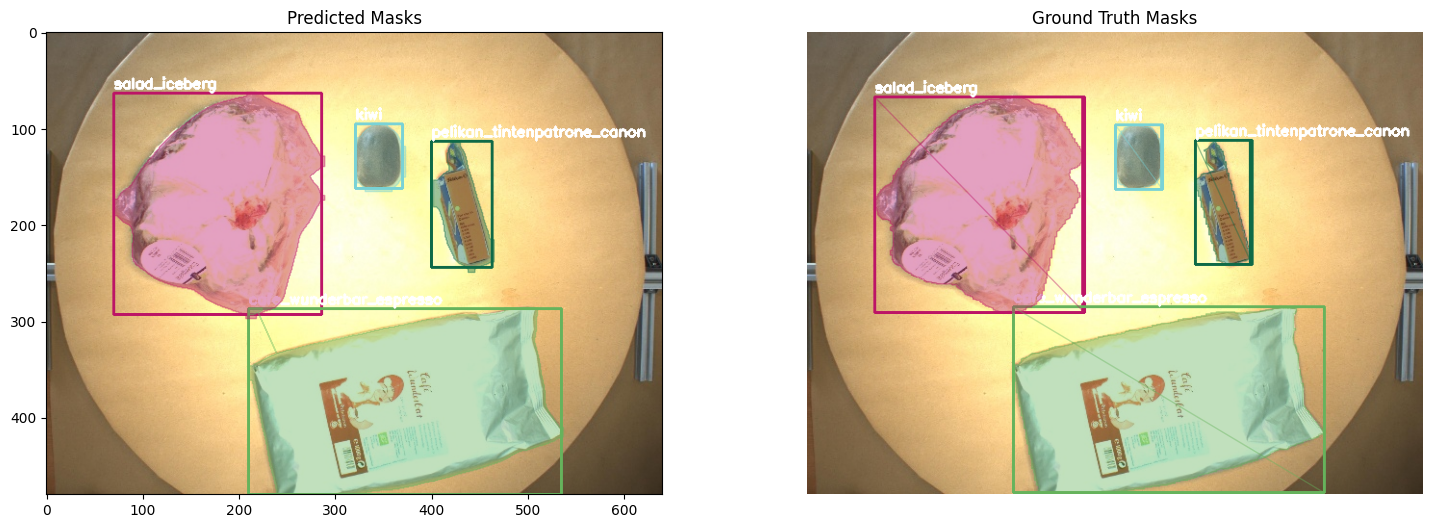


image 1/1 /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_068128_D2S_validation.jpg: 480x640 1 gepa_bio_und_fair_kraeuterteemischung, 2 ethiquable_gruener_tee_ceylons, 2 gepa_bio_und_fair_pfefferminztees, 1 koelln_muesli_fruechte, 1 corny_schoko_banane, 1 pasta_reggia_spaghetti, 1 gepa_italienischer_bio_espresso, 2 corny_nussvoll_singles, 1 gepa_bio_caffe_crema, 1 corn_salad, 1 clementine, 1 apple_braeburn_bundle, 1 adelholzener_classic_naturell_02, 1 adelholzener_classic_bio_apfelschorle_02, 428.7ms
Speed: 2.4ms preprocess, 428.7ms inference, 36.6ms postprocess per image at shape (1, 3, 480, 640)


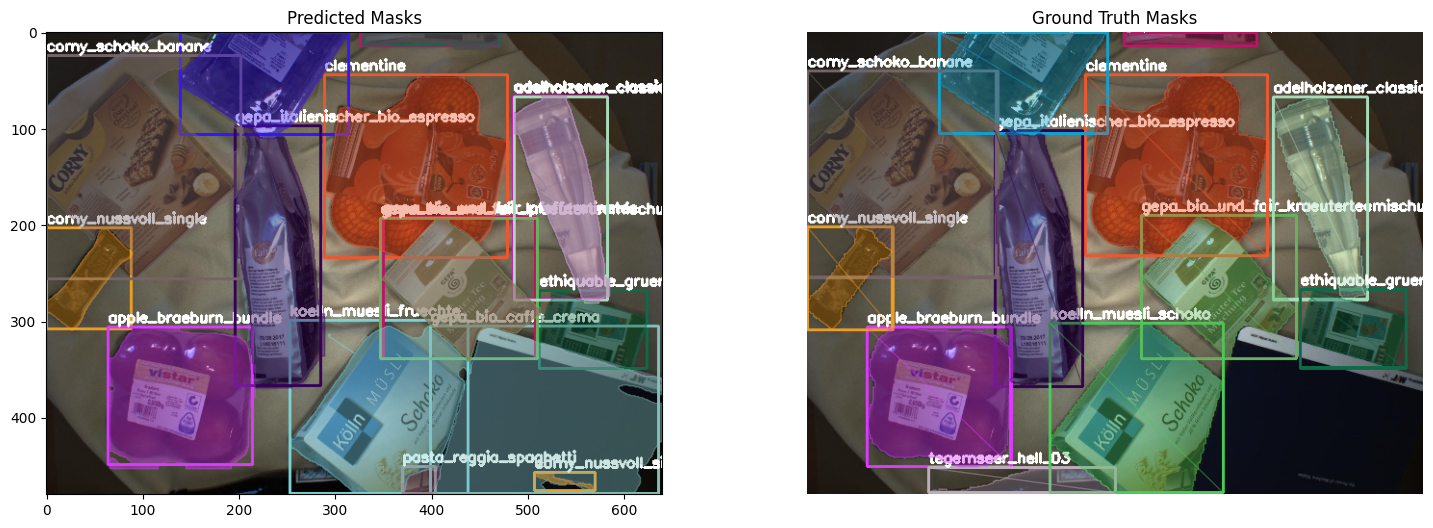


image 1/1 /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_043205_D2S_validation.jpg: 480x640 1 corny_nussvoll, 1 cocoba_cocoa, 1 grapes_sweet_celebration_seedless, 430.3ms
Speed: 3.0ms preprocess, 430.3ms inference, 8.3ms postprocess per image at shape (1, 3, 480, 640)


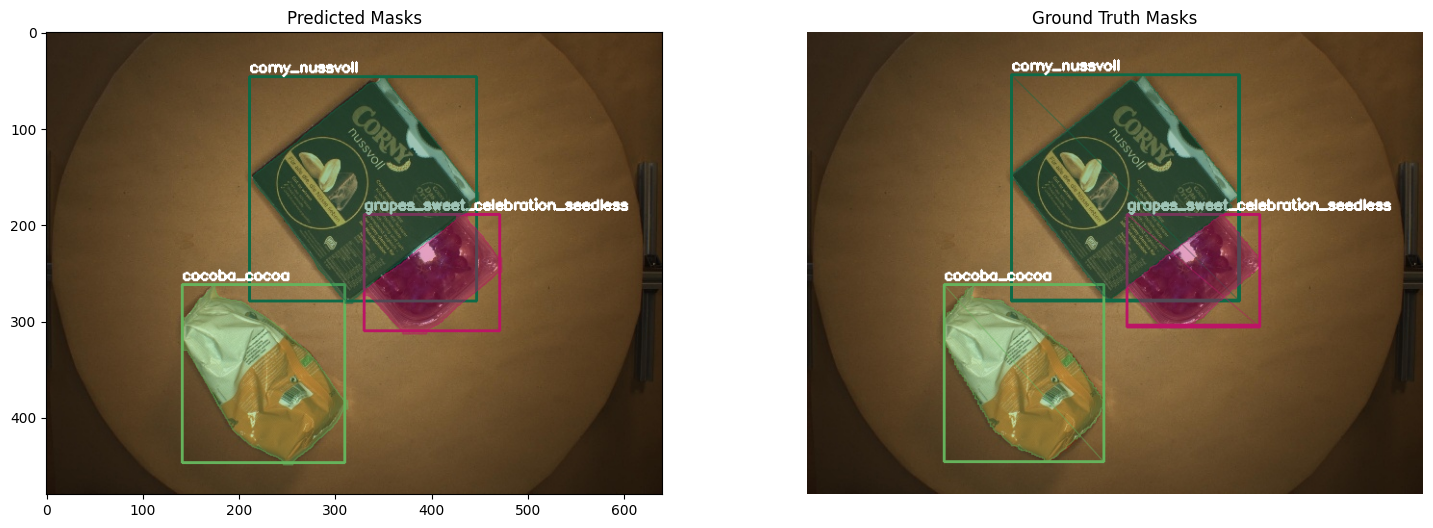


image 1/1 /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_066623_D2S_validation_random_background.jpg: 480x640 1 kilimanjaro_tea_earl_grey, 1 corny_schoko_banane, 1 orange_single, 1 avocado, 1 banana_single, 1 pasta_reggia_fusilli, 3 pasta_reggia_spaghettis, 2 caona_cocoas, 1 gepa_bio_caffe_crema, 426.1ms
Speed: 2.4ms preprocess, 426.1ms inference, 24.4ms postprocess per image at shape (1, 3, 480, 640)


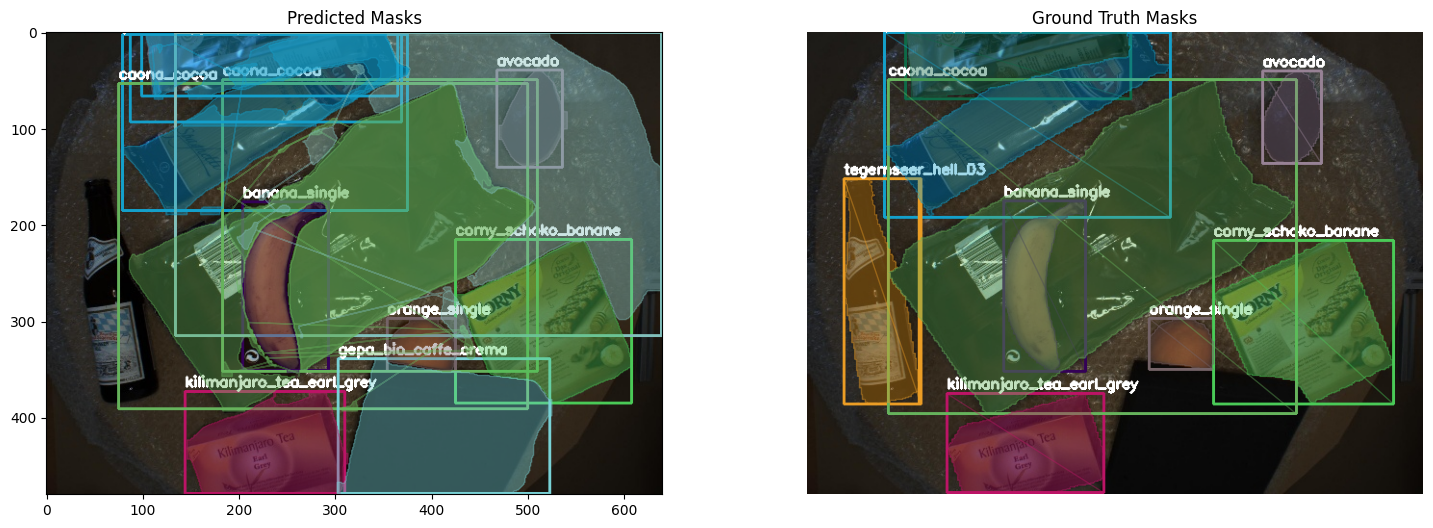


image 1/1 /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_065327_D2S_validation.jpg: 480x640 1 ethiquable_gruener_tee_ceylon, 1 kilimanjaro_tea_earl_grey, 1 clementine_single, 1 banana_bundle, 1 kiwi, 1 pasta_reggia_fusilli, 1 gepa_italienischer_bio_espresso, 1 douwe_egberts_professional_ground_coffee, 1 corny_nussvoll_single, 1 corny_schoko_banane_single, 1 corn_salad, 1 clementine, 439.5ms
Speed: 2.4ms preprocess, 439.5ms inference, 23.6ms postprocess per image at shape (1, 3, 480, 640)


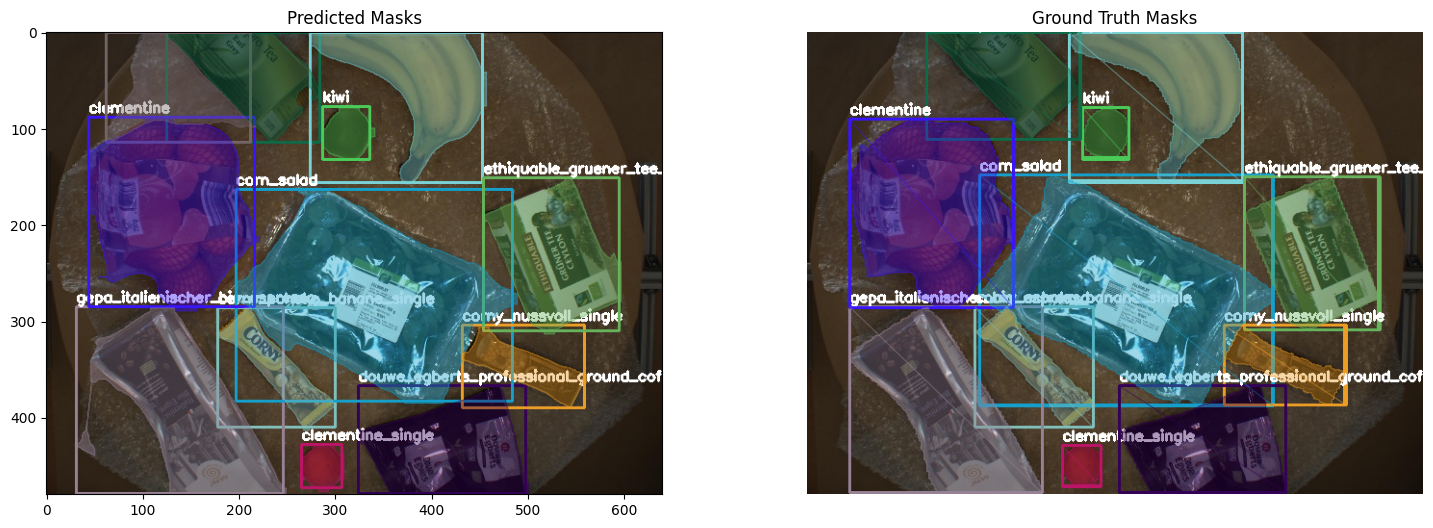


image 1/1 /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_066625_D2S_validation_clutter.jpg: 480x640 1 kilimanjaro_tea_earl_grey, 1 corny_schoko_banane, 1 orange_single, 1 avocado, 1 banana_single, 2 pasta_reggia_fusillis, 1 pasta_reggia_spaghetti, 2 caona_cocoas, 1 gepa_italienischer_bio_espresso, 1 augustiner_lagerbraeu_hell_05, 1 tegernseer_hell_03, 430.6ms
Speed: 3.6ms preprocess, 430.6ms inference, 25.1ms postprocess per image at shape (1, 3, 480, 640)


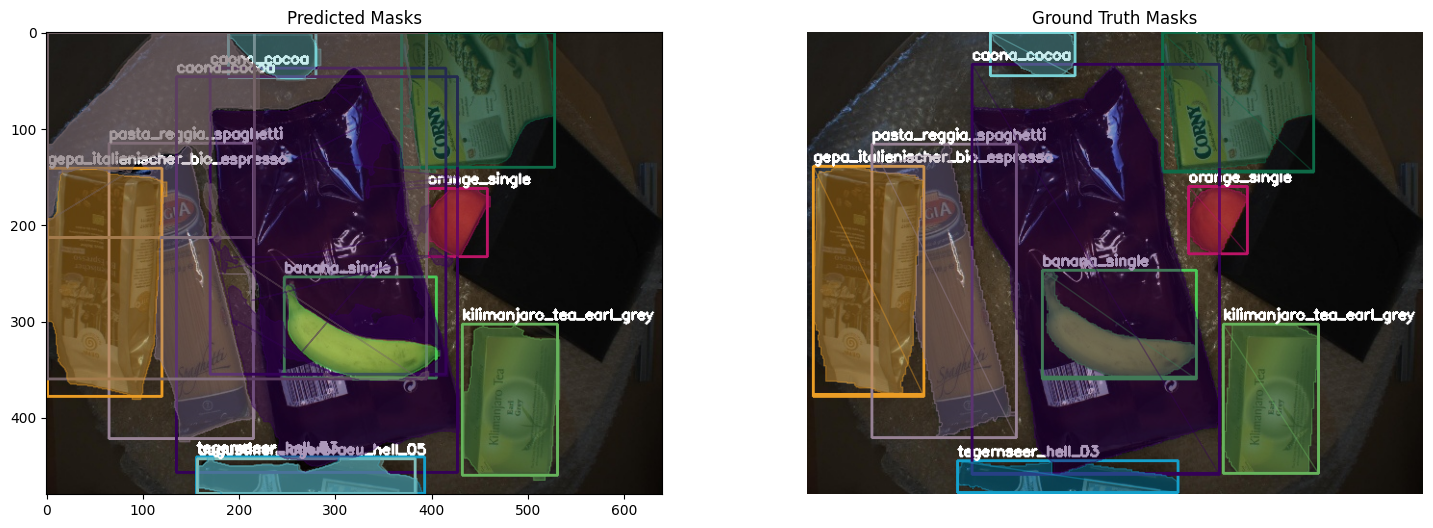


image 1/1 /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_068423_D2S_validation_random_background.jpg: 480x640 1 gepa_bio_und_fair_rooibostee, 1 kilimanjaro_tea_earl_grey, 1 cucumber, 1 apple_golden_delicious, 1 suntory_gokuri_lemonade, 1 pasta_reggia_spaghetti, 1 douwe_egberts_professional_ground_coffee, 1 corny_nussvoll_single, 1 corny_schoko_banane_single, 1 gepa_bio_caffe_crema, 1 grapes_sweet_celebration_seedless, 1 salad_iceberg, 1 adelholzener_classic_bio_apfelschorle_02, 440.6ms
Speed: 2.3ms preprocess, 440.6ms inference, 26.0ms postprocess per image at shape (1, 3, 480, 640)


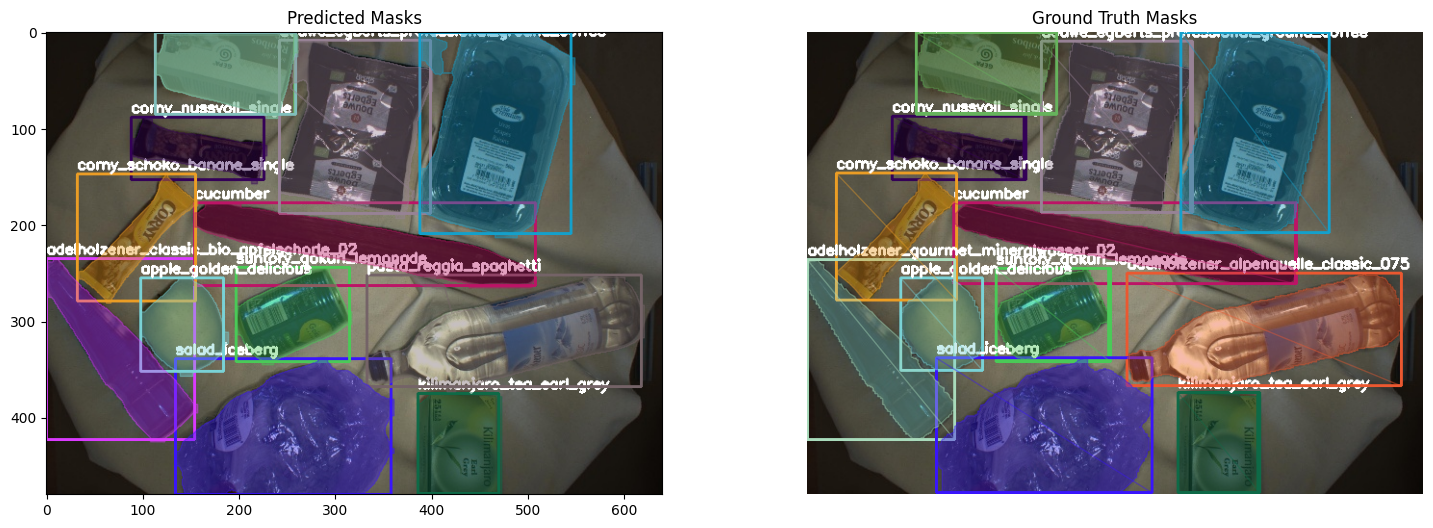


image 1/1 /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_066619_D2S_validation.jpg: 480x640 1 kilimanjaro_tea_earl_grey, 1 corny_schoko_banane, 1 apple_golden_delicious, 1 avocado, 1 banana_single, 2 pasta_reggia_fusillis, 7 pasta_reggia_spaghettis, 3 caona_cocoas, 1 gepa_italienischer_bio_espresso, 1 adelholzener_classic_bio_apfelschorle_02, 1 tegernseer_hell_03, 437.7ms
Speed: 7.7ms preprocess, 437.7ms inference, 54.4ms postprocess per image at shape (1, 3, 480, 640)


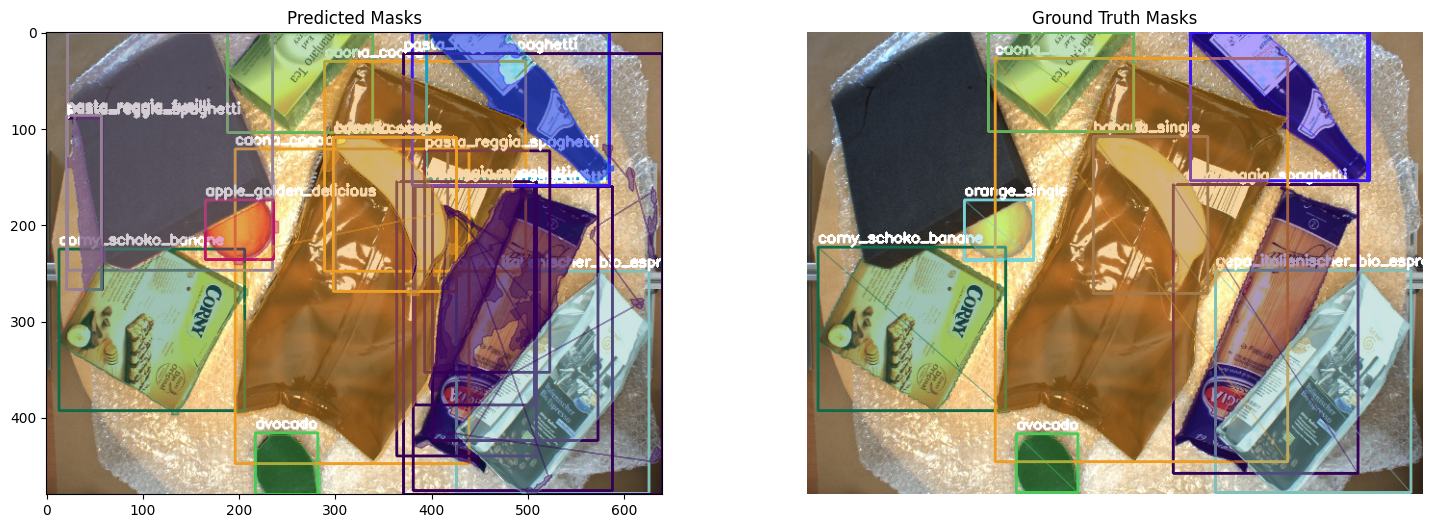


image 1/1 /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_028118_D2S_validation.jpg: 480x640 1 corny_schoko_banane, 1 cucumber, 1 pasta_reggia_spaghetti, 1 cafe_wunderbar_espresso, 1 vine_tomatoes, 470.9ms
Speed: 2.5ms preprocess, 470.9ms inference, 11.0ms postprocess per image at shape (1, 3, 480, 640)


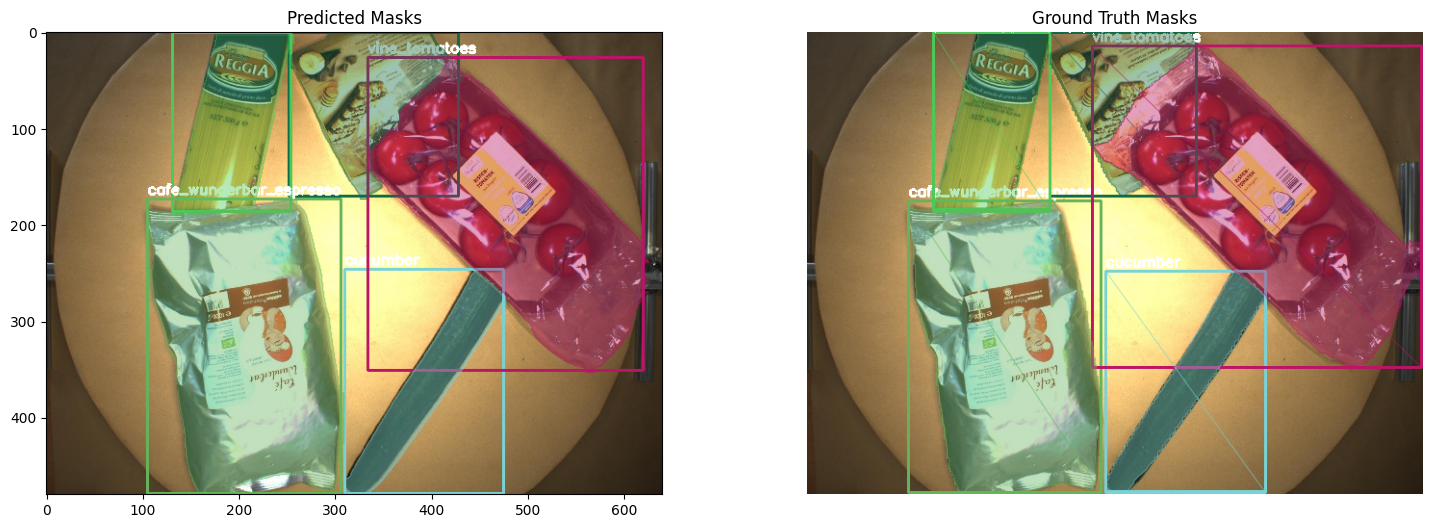

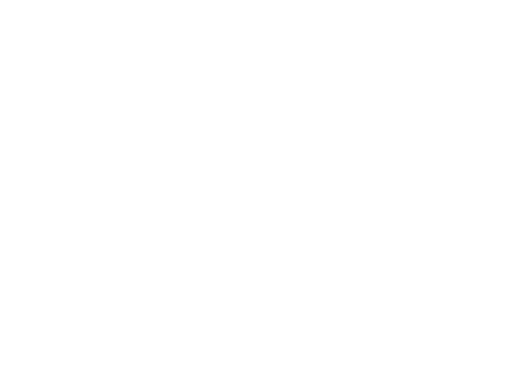

In [24]:
imgs_path = [os.path.join("./datasets/images/val",sample) for sample in val_sample]
anns_path = [os.path.join("./datasets/labels/val",sample.replace(".jpg",".txt")) for sample in val_sample]

for image_path, ann_path in zip(imgs_path, anns_path):

  results = model(image_path)  # predict on an image
  # Access the results
  xy = results[0].masks.xy  # mask in polygon format
  boxes = results[0].boxes.xywh.cpu().numpy()
  class_ids = results[0].boxes.cls.cpu().numpy().astype(int)


  instances = read_yolo_annotation(ann_path)
  true_masks = [instance["polygon"] for instance in instances]
  true_classIds = [int(instance["classId"]) for instance in instances]

  img = cv2.imread(image_path)  # Load image
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  output = draw_yolo_predictions_vs_ground_truth(img, boxes, xy, class_ids,
                                               true_masks,
                                               true_classIds,
                                               class_names=classId_names,
                                               )

plt.axis("off")
plt.show()

# Performance Evaluation

In [25]:
import time
import torch
import numpy as np
from ultralytics import YOLO

def measure_inference_time(model_path, test_images, device="cuda"):
    """
    Measures inference time of a YOLO model.

    Args:
        model_path (str): Path to the trained YOLO model.
        test_images (list): List of test image file paths.
        device (str): "cuda" for GPU or "cpu".

    Returns:
        dict: Average inference time and FPS.
    """
    times = []

    for img in test_images:

        start_time = time.time()
        model.predict(img)  # Run inference
        end_time = time.time()

        times.append(end_time - start_time)

    avg_time = np.mean(times)
    fps = 1 / avg_time

    return {"avg_inference_time (s)": avg_time, "FPS": fps}

# Example usage
test_images = imgs_path
efficiency_metrics = measure_inference_time(model, test_images)
print(efficiency_metrics)



image 1/1 /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_066702_D2S_validation_random_background.jpg: 480x640 1 gepa_bio_und_fair_kamillentee, 1 gepa_bio_und_fair_pfefferminztee, 1 pelikan_tintenpatrone_canon, 1 cucumber, 1 pear, 2 pasta_reggia_fusillis, 1 corny_nussvoll_single, 1 cocoba_cocoa, 1 corn_salad, 1 augustiner_weissbier_05, 447.9ms
Speed: 3.9ms preprocess, 447.9ms inference, 31.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_035414_D2S_validation.jpg: 480x640 1 pelikan_tintenpatrone_canon, 1 kiwi, 1 cafe_wunderbar_espresso, 1 salad_iceberg, 389.9ms
Speed: 1.7ms preprocess, 389.9ms inference, 9.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/smart-cart/yolo/datasets/images/val/D2S_068128_D2S_validation.jpg: 480x640 1 gepa_bio_und_fair_kraeuterteemischung, 2 ethiquable_gruener_tee_ceylons, 2 gepa_bio_und_fair_pfefferminztees, 1 koelln_muesli_frue

In [3]:
import os

def get_model_size(model_path):
    """
    Gets the YOLO model size in MB.

    Args:
        model_path (str): Path to the model file.

    Returns:
        float: Model size in MB.
    """
    size_in_mb = os.path.getsize(model_path) / (1024 * 1024)  # Convert bytes to MB
    return size_in_mb

# Example usage
model_path = "runs/segment/train11/weights/best.pt"
model_size = get_model_size(model_path)
print(f"Model Size: {model_size:.2f} MB")


Model Size: 19.62 MB


In [ ]:
!pip install thop

In [4]:
import torch
from thop import profile
def compute_flops(model, input_size=(1, 3, 640, 640)):
    """
    Computes FLOPs of a YOLO model.

    Args:
        model_path (str): Path to YOLO model.
        input_size (tuple): Input shape (batch, channels, height, width).

    Returns:
        float: FLOPs in GFLOPs.
    """
    dummy_input = torch.randn(input_size).to("cuda" if torch.cuda.is_available() else "cpu")

    flops, params = profile(model.model, inputs=(dummy_input,))
    return {"FLOPs (GFLOPS)": flops / 1e9, "Params (M)": params / 1e6}

# Example usage
flops_metrics = compute_flops(model)
print(flops_metrics)


[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_upsample() for <class 'torch.nn.modules.upsampling.Upsample'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.ConvTranspose2d'>.
{'FLOPs': 17.8595584, 'Params (M)': 10.105508}


# Test Model on Test images

In [ ]:
image_path = "./datasets/images/test/1.jpg"
results = model(image_path)  # predict on an image
# Access the results

# Conversion to ONNX

This would be useful to optimize the model for mobile phones

In [ ]:
# Export the model
model.export(format="onnx",
             imgsz=640,
             half=True,
             dynamic=True,
             simplify=True,
             nms=True,
             batch=3)